# Topic around the Data Science Job Descriptions in South Africa
_2022_

In [ ]:
#package for visualising topic models
!pip install pyLDAvis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt

from IPython.display import HTML
%matplotlib inline

import re
import gensim
from gensim.models import CoherenceModel

In [7]:
#github repo has the scraper code 
df = pd.read_csv('https://raw.githubusercontent.com/RidhaMoosa/nandetech-job_analysis-indeed_jobs-/main/df_cj_ds(02_2022).csv')
df.head()

,Unnamed: 0,Job Title,Job Description,Salary,Position,Location,Updated Time,Expiry Date,Job Reference
0,0,Cloud Data Scientist,This role is for a a Cloud Data Scientist who ...,R Undisclosed,Permanent Senior position,"Gauteng, South Africa",Posted 30 Jan 2022,Expires in 10 days,Job 2444475 - Ref AF_0112_6346
1,1,Data Scientist (Decision Science team) (CH726)...,Our client in the Banking industry is looking ...,R Undisclosed,Permanent Intermediate position,"Winelands, Western Cape",Posted 30 Jan 2022,Expires in 11 days,Job 2444424 - Ref 1925410126
2,2,Data Scientist,"Job & Company Description:You will design, dev...",R Undisclosed,Permanent Senior position,"Pretoria Region, Gauteng",Posted 30 Jan 2022,Expires in 18 days,Job 2446038 - Ref BR1012742LJa
3,3,Data Scientist with Azure - Midrand - R700 per...,A global multinational corporation and a leade...,"R112,000 per month",Contract Senior position,"Midrand, Gauteng",Posted 28 Jan 2022,Expires in 31 days,Job 2447426 - Ref NN54382
4,4,Data Scientist,Data Scientist required at at the Johannesburg...,Undisclosed,Permanent Senior position,"Sunninghill, Gauteng",Posted 27 Jan 2022,Expires in 21 days,Job 2445485 - Ref 21293


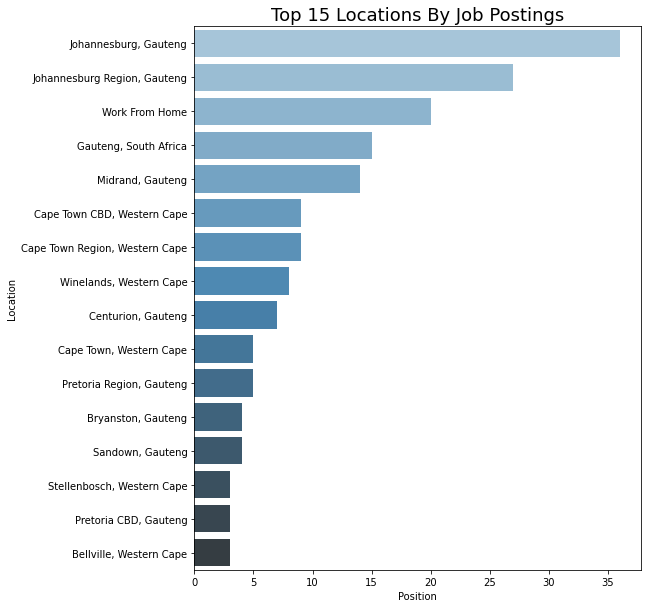

In [8]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

#Dataset relating to recruiters
rec_df = df.groupby('Location').count().sort_values(by='Position', ascending=False).reset_index()[['Location', 'Position']].copy()

# Plot the total crashes
pal = sns.color_palette("Blues_d", 16)
sns.barplot(x="Position", y="Location", data=rec_df.loc[0:15,:],
            label="Total", palette=pal)

plt.title('Top 15 Locations By Job Postings', fontsize=18);

Number of roles containing 'Manager': 10
23


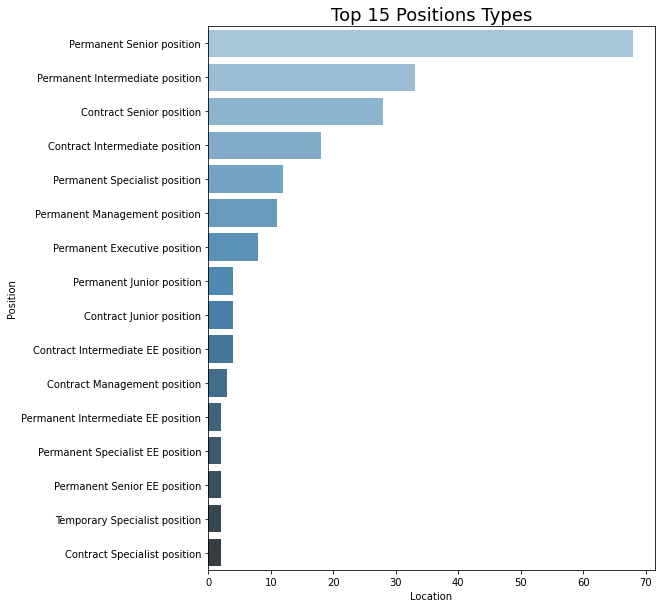

In [9]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

#Dataset relating to recruiters
rec_df = df.groupby('Position').count().sort_values(by='Location', ascending=False).reset_index()[['Location', 'Position']].copy()

# Plot the total crashes
pal = sns.color_palette("Blues_d", 16)
sns.barplot(x="Location", y="Position", data=rec_df.loc[0:15,:],
            label="Total", palette=pal)

print("Number of roles containing 'Manager':",  df[df['Position'].str.contains("Junior")].shape[0])
print(df['Position'].nunique())
plt.title('Top 15 Positions Types', fontsize=18);

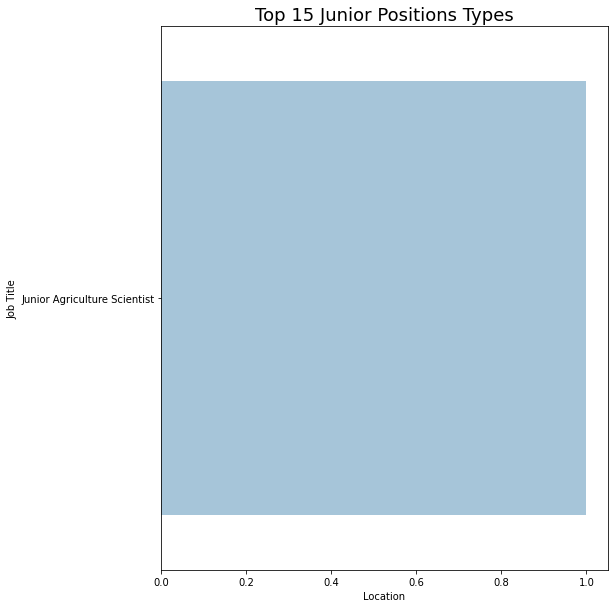

In [10]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

#Dataset relating to recruiters
rec_df = df[df['Job Title'].str.contains("unior")].groupby('Job Title').count().sort_values(by='Location', ascending=False).reset_index()[['Location', 'Job Title']].copy()

# Plot the total crashes
pal = sns.color_palette("Blues_d", 16)
sns.barplot(x="Location", y="Job Title", data=rec_df,
            label="Total", palette=pal)

plt.title('Top 15 Junior Positions Types', fontsize=18);

In [11]:
df['Job Title'] = df['Job Title'].apply(lambda x: x.lower())

#Group by Job Titles to investigate different types
df_grp = df.groupby(['Job Title']).count().reset_index().sort_values(by='Location', ascending=False)[['Job Title', 'Location']]

print("Number of unique Job Titles:", df_grp.shape[0])

print("Number of titles used more than once:", df_grp[df_grp.Location > 1].shape[0])

df_grp[df_grp.Location > 2]

Number of unique Job Titles: 182
Number of titles used more than once: 9


,Job Title,Location
51,data engineer,11
38,data analyst,7
76,data scientist,6
8,analyst developer: bancs,3


In [12]:
df[df['Job Title'] == 'data scientist'].groupby(['Location']).size()

Location
Johannesburg, Gauteng       2
Pretoria Region, Gauteng    1
Sunninghill, Gauteng        1
Work From Home              2
dtype: int64

In [13]:
df['Role'] = df['Position'].apply(lambda x: x.lower())

#Group by Role to investigate different types
df_grp = df.groupby('Position').count().reset_index().sort_values(by='Location', ascending=False)[['Role', 'Location']]

print("Number of unique job roles:", df_grp.shape[0])

print("Number of titles used more than once:", df_grp[df_grp.Location > 1].shape[0])

df_grp[df_grp.Location > 2]

Number of unique job roles: 23
Number of titles used more than once: 16


,Role,Location
18,68,68
12,33,33
6,28,28
2,18,18
20,12,12
16,11,11
10,8,8
14,4,4
4,4,4
1,4,4


In [14]:
# job titles that are common
df.groupby('Job Title').count().reset_index()

,Job Title,Unnamed: 0,Job Description,Salary,Position,Location,Updated Time,Expiry Date,Job Reference,Role
0,12 month fixed term contract vacancy - lab ana...,1,1,1,1,1,1,1,1,1
1,actuarial analyst,2,2,2,2,2,2,2,2,2
2,actuarial analyst insurance,1,1,1,1,1,1,1,1,1
3,actuarial specialist,1,1,1,1,1,1,1,1,1
4,actuarial specialist - valuations at rand mutu...,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
177,tableau bi developer (contract) tb at mediro ict,1,1,1,1,1,1,1,1,1
178,technical automation analyst,1,1,1,1,1,1,1,1,1
179,technical lead - retail bi at datafin recruitment,1,1,1,1,1,1,1,1,1
180,technical services specialist - engineering pl...,1,1,1,1,1,1,1,1,1


In [15]:
#differing salary brackets
df.groupby(['Salary']).count().reset_index()

,Salary,Unnamed: 0,Job Title,Job Description,Position,Location,Updated Time,Expiry Date,Job Reference,Role
0,R Undisclosed,88,88,88,88,88,88,88,88,88
1,"R00 - R58,300 per month",1,1,1,1,1,1,1,1,1
2,"R100,000 per month",3,3,3,3,3,3,3,3,3
3,"R108,300 per month",1,1,1,1,1,1,1,1,1
4,"R112,000 per month",1,1,1,1,1,1,1,1,1
5,"R125,000 - R137,500 per month",1,1,1,1,1,1,1,1,1
6,"R15,000 - R20,000 per month",1,1,1,1,1,1,1,1,1
7,"R18,000 - R20,000 per month",1,1,1,1,1,1,1,1,1
8,"R20,000 - R30,000 per month",2,2,2,2,2,2,2,2,2
9,"R20,800 - R25,000 per month",1,1,1,1,1,1,1,1,1


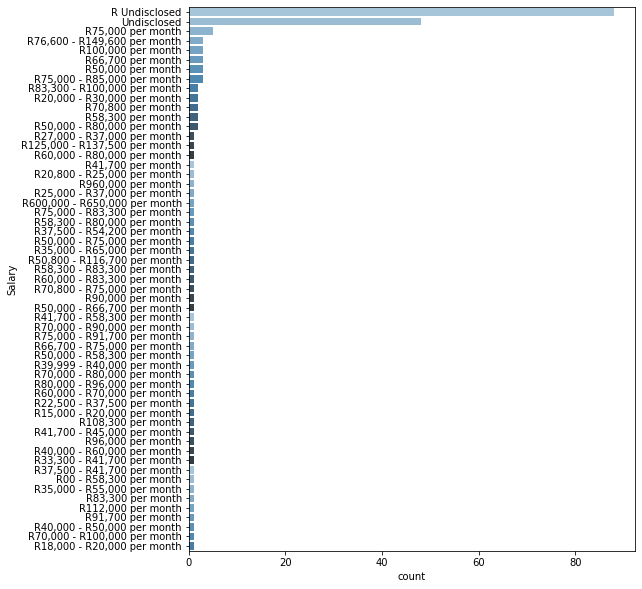

In [16]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

pal = sns.color_palette("Blues_d", 16)
sns.countplot(y='Salary', data=df, order=df.Salary.value_counts().index, palette=pal)

In [20]:
#extract the salary brackets

def salary_currency(df):
  
  x = re.findall(r'(?:[,\d]+.?\d*)', df)
  return x

df['Salary_brackets'] = df['Salary'].apply(salary_currency)

In [26]:
#create minimum and maximum salary ranges for each job 

df['min'] = df['Salary_brackets'].str[0].str.replace(',', '').astype(np.float)
df['max'] = df['Salary_brackets'].str[1].str.replace(',', '').astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [28]:
df.head()

,Unnamed: 0,Job Title,Job Description,Salary,Position,Location,Updated Time,Expiry Date,Job Reference,Role,Salary_brackets,min,max
0,0,cloud data scientist,This role is for a a Cloud Data Scientist who ...,R Undisclosed,Permanent Senior position,"Gauteng, South Africa",Posted 30 Jan 2022,Expires in 10 days,Job 2444475 - Ref AF_0112_6346,permanent senior position,[],NaN,NaN
1,1,data scientist (decision science team) (ch726)...,Our client in the Banking industry is looking ...,R Undisclosed,Permanent Intermediate position,"Winelands, Western Cape",Posted 30 Jan 2022,Expires in 11 days,Job 2444424 - Ref 1925410126,permanent intermediate position,[],NaN,NaN
2,2,data scientist,"Job & Company Description:You will design, dev...",R Undisclosed,Permanent Senior position,"Pretoria Region, Gauteng",Posted 30 Jan 2022,Expires in 18 days,Job 2446038 - Ref BR1012742LJa,permanent senior position,[],NaN,NaN
3,3,data scientist with azure - midrand - r700 per...,A global multinational corporation and a leade...,"R112,000 per month",Contract Senior position,"Midrand, Gauteng",Posted 28 Jan 2022,Expires in 31 days,Job 2447426 - Ref NN54382,contract senior position,"[112,000 ]",112000.0,NaN
4,4,data scientist,Data Scientist required at at the Johannesburg...,Undisclosed,Permanent Senior position,"Sunninghill, Gauteng",Posted 27 Jan 2022,Expires in 21 days,Job 2445485 - Ref 21293,permanent senior position,[],NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


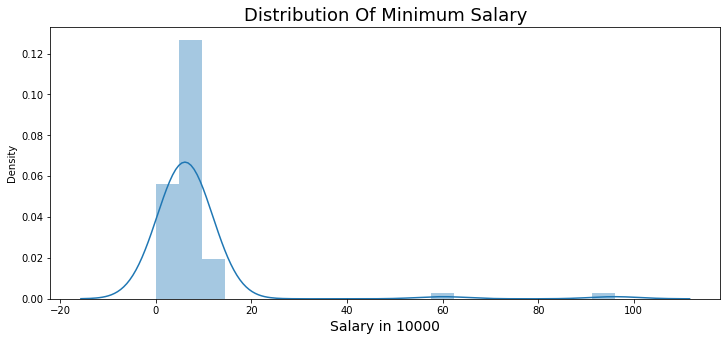

In [27]:
f, ax = plt.subplots(figsize=(12, 5))

sns.distplot(df['min']/10000,bins=20)
ax.set_title('Distribution Of Minimum Salary', fontsize=18)
ax.set_xlabel('Salary in 10000', fontsize=14);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


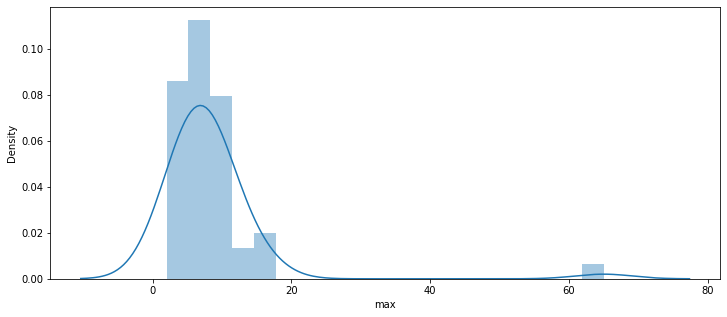

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))

sns.distplot(df['max']/10000, bins)

In [ ]:
#investigating the "junior" title ranges

df_junior = df[df['Position'].str.contains('unior')]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


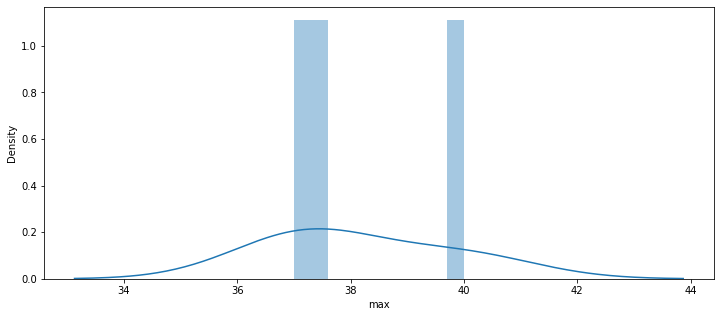

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))

sns.distplot(df_junior['max']/1000, bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


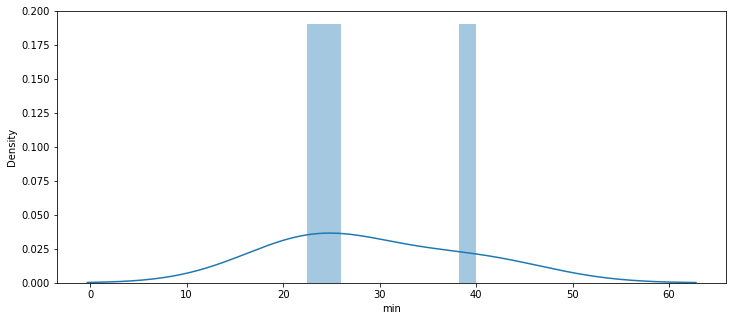

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))

sns.distplot(df_junior['min']/1000, bins=10)

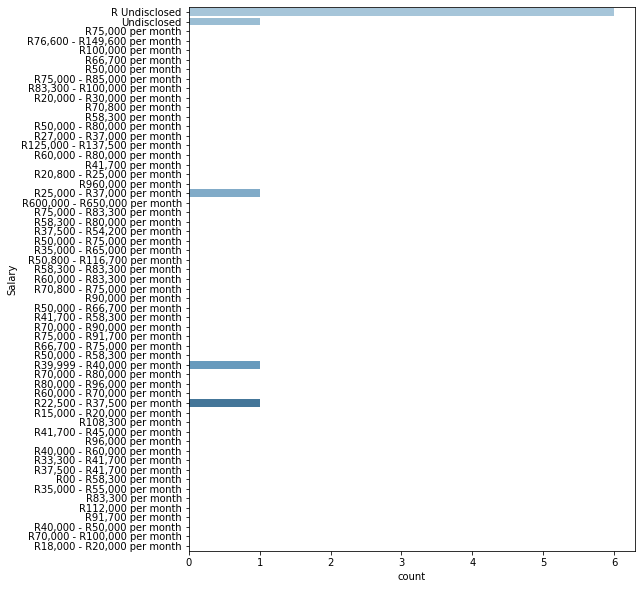

In [ ]:
f, ax = plt.subplots(figsize=(8, 10))

pal = sns.color_palette("Blues_d", 16)
sns.countplot(y='Salary', data=df_junior, order=df.Salary.value_counts().index, palette=pal)

## LDA Topic Modelling
Referenced from : [This Github Repo](https://github.com/tec-88/LDA_Job_Search/blob/master/LDA_Job_Search.ipynb)

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
from textblob import Word

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
## Lower case
df['Job Description'] = df['Job Description'].apply(lambda x: " ".join(x.lower()for x in x.split()))
## remove tabulation and punctuation
df['Job Description'] = df['Job Description'].str.replace('[^\w\s]',' ')
## digits
df['Job Description'] = df['Job Description'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
df['Job Description'] = df['Job Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
df['Job Description'] = df['Job Description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print("Preprocessed data: \n")
print(df.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Preprocessed data: 

   Unnamed: 0                                          Job Title  ...       min max
0           0                               Cloud Data Scientist  ...       NaN NaN
1           1  Data Scientist (Decision Science team) (CH726)...  ...       NaN NaN
2           2                                     Data Scientist  ...       NaN NaN
3           3  Data Scientist with Azure - Midrand - R700 per...  ...  112000.0 NaN
4           4                                     Data Scientist  ...       NaN NaN

[5 rows x 12 columns]


In [ ]:
other_stop_words = ['junior', 'senior','experience','etc','job','work','company','technique',
                    'candidate','skill','skills','language','menu','inc','new','plus','years',
                   'technology','organization','ceo','cto','account','manager','data','scientist','mobile',
                    'developer','product','revenue','strong']

df['Job Description'] = df['Job Description'].apply(lambda x: " ".join(x for x in x.split() if x not in other_stop_words))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

corpus = df['Job Job Description']
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(corpus)

#Dataframe with cosine similarties
cos_df = pd.DataFrame(cosine_similarity(X_train_counts))

#Dataframe for job advert and similarity with every other advert
i, j = np.indices(cos_df.shape).reshape(2, -1)
cos_values = cos_df.values.reshape(-1)
cos_sim_df = pd.DataFrame({'i': i, 'j': j, 'sim':cos_values})

#Any advert that has a cosine similarity above 0.98 and doesn't equal itself
cos_rem = cos_sim_df[(cos_sim_df['sim']>0.98)&(i!=j)]

#Method to remove duplicates but keep first instance. Trying to drop duplicates on i and j column wouldn't work as the numbers don't duplicate in those
#columns. Setting another column that combines their values ensure that duplicates can be dropped.

cos_rem['i*j'] = cos_rem['i'] * cos_rem['j']
drop_rows = np.unique(cos_rem.drop_duplicates(subset=['i*j'], keep='first')['i'].values)

#Drop from original dataframe
df = df[~df.index.isin(drop_rows)]
df = df.reset_index()
df.drop(columns={'index'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
## Converting text to features 
vectorizer = TfidfVectorizer()
#Tokenize and build vocabulary
X = vectorizer.fit_transform(df['Job Description'])
y = df['Job Title']

# split data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) 
print("train data shape: ",X_train.shape)
print("test data shape: ",X_test.shape)

# Fit model
clf = MultinomialNB()
clf.fit(X_train, y_train)
## Predict
y_predicted = clf.predict(X_test)

train data shape:  (168, 5471)
test data shape:  (42, 5471)


In [ ]:
corpus = df['Job Description']

In [ ]:
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()

#Function to pre-process the text information

def normalize_document(doc):
    
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A) #re.I (ignore case), re.A (ASCII-only matching)
    doc = doc.lower()
    doc = doc.strip()
    
    # tokenize document
    tokens = wpt.tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatise document from filtered tokens
    lem_text = [lemmatizer.lemmatize(i) for i in filtered_tokens]
    
    # Remove words that are only one character.
    lem_text = [token for token in lem_text if len(token) > 1]
    
    # Remove numbers, but not words that contain numbers.
    lem_text = [token for token in lem_text if not token.isnumeric()]
    
    doc = ' '.join(lem_text)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import gensim.corpora as corpora

#Tokenise the corpus
tokenized_corp = [word_tokenize(i) for i in norm_corpus]

# Create Dictionary
id2word = corpora.Dictionary(tokenized_corp)

#Remove words that don't feature 20 times and those that feature in over 50% of documents
id2word.filter_extremes(no_below=20, no_above=0.5)

texts = tokenized_corp

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def compute_coherence_values(corpus, dictionary, texts, end, start=2, step=3):

    coherence_values = []
    model_list = []
    
    for num_topics in range(start, end, step):
    
        # Build LDA model
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               random_state=123,
                                               chunksize=100,
                                               passes=500,
                                               per_word_topics=True)
        model_list.append(lda_model)
        
        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model_lda.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(corpus=corpus, dictionary = id2word, texts=texts, start=8, end=16, step=1)

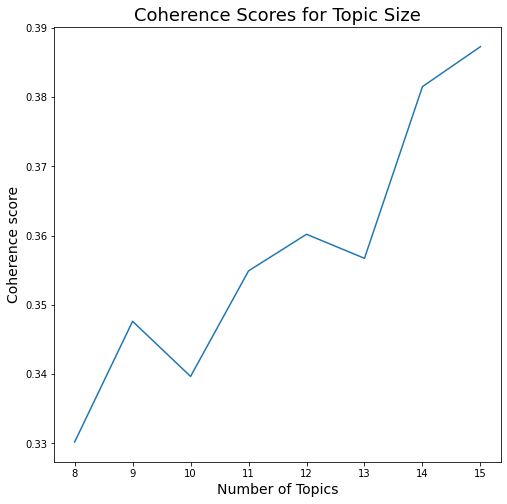

In [ ]:
# Show graph
end=16; start=8; step=1;
x = range(start, end, step)
ax = plt.subplots(figsize=(8,8))
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics", fontsize=14)
plt.ylabel("Coherence score", fontsize=14)
plt.title('Coherence Scores for Topic Size', fontsize=18)
plt.show();

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=15, 
                                       random_state=123,
                                       chunksize=100,
                                       passes=500,
                                       per_word_topics=True)

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.38785079744642115


In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.066*"research" + 0.066*"insight" + 0.031*"client" + 0.028*"service" + '
  '0.020*"market" + 0.020*"decision" + 0.019*"ensure" + 0.018*"design" + '
  '0.018*"process" + 0.018*"understanding"'),
 (1,
  '0.044*"developing" + 0.042*"ensuring" + 0.040*"successful" + 0.039*"market" '
  '+ 0.037*"strategy" + 0.033*"process" + 0.031*"role" + 0.031*"related" + '
  '0.030*"monitoring" + 0.024*"good"'),
 (2,
  '0.003*"insight" + 0.003*"innovative" + 0.003*"perform" + 0.003*"objective" '
  '+ 0.003*"monitor" + 0.003*"microsoft" + 0.003*"manage" + 0.003*"line" + '
  '0.003*"key" + 0.003*"internal"'),
 (3,
  '0.003*"insight" + 0.003*"innovative" + 0.003*"perform" + 0.003*"objective" '
  '+ 0.003*"monitor" + 0.003*"microsoft" + 0.003*"manage" + 0.003*"line" + '
  '0.003*"key" + 0.003*"internal"'),
 (4,
  '0.031*"application" + 0.024*"please" + 0.018*"minimum" + 0.017*"client" + '
  '0.014*"relevant" + 0.014*"learning" + 0.013*"statistical" + '
  '0.013*"position" + 0.012*"environment" + 0.0

In [ ]:
lda_dict = {0:'Research & Design for clients', 
            1:'Developing and Strategy', 
            2:'Microsoft', 
            3:'Python, cloud, SQL, Integration',
            4:'Healthcare',
            5:'Analytics & Statistical Modelling',
            6:'Financial',
            7:'Software Engineering',
            8:'Customer Call Support', 
           '-':'-'}

In [ ]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.066*"research" + 0.066*"insight" + 0.031*"client" + 0.028*"service" + 0.020*"market" + 0.020*"decision" + 0.019*"ensure" + 0.018*"design" + 0.018*"process" + 0.018*"understanding"'), (1, '0.044*"developing" + 0.042*"ensuring" + 0.040*"successful" + 0.039*"market" + 0.037*"strategy" + 0.033*"process" + 0.031*"role" + 0.031*"related" + 0.030*"monitoring" + 0.024*"good"'), (2, '0.003*"insight" + 0.003*"innovative" + 0.003*"perform" + 0.003*"objective" + 0.003*"monitor" + 0.003*"microsoft" + 0.003*"manage" + 0.003*"line" + 0.003*"key" + 0.003*"internal"'), (3, '0.003*"insight" + 0.003*"innovative" + 0.003*"perform" + 0.003*"objective" + 0.003*"monitor" + 0.003*"microsoft" + 0.003*"manage" + 0.003*"line" + 0.003*"key" + 0.003*"internal"'), (4, '0.031*"application" + 0.024*"please" + 0.018*"minimum" + 0.017*"client" + 0.014*"relevant" + 0.014*"learning" + 0.013*"statistical" + 0.013*"position" + 0.012*"environment" + 0.012*"report"'), (5, '0.042*"area" + 0.028*"support" + 0.028*"valu

In [ ]:
#use this version if on colab

!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 5.5 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=34e9fdbb77d37098d72a447ae7973abfeae2b7667b483e3354b29f12b0195bb6
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [ ]:
import pyLDAvis
import pyLDAvis.gensim
import pickle 
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  return pd.DataFrame({'Term': vocab[term_ix], \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.203030 -0.093713       1        1  21.990301
4     -0.064688  0.006349       2        1  19.620987
7     -0.248557 -0.029074       3        1  11.028060
5      0.008242  0.151949       4        1   9.636824
6      0.115097 -0.041321       5        1   8.568960
0      0.102790  0.063698       6        1   5.236141
11    -0.048224 -0.090235       7        1   4.812065
8      0.185215 -0.079344       8        1   4.408299
9      0.151229  0.003920       9        1   3.861441
13    -0.016248 -0.287234      10        1   3.235523
10    -0.106865  0.306985      11        1   2.662682
14     0.234551  0.067182      12        1   2.617330
1      0.084499 -0.026072      13        1   2.193239
2     -0.097006  0.023455      14        1   0.064074
3     -0.097006  0.023455      15        1   0.064074, topic_info=           Term        Freq       Total Category  logprob  loglift
36        model  165.000000  165.000000  Default  30.0000  30.0000
162     removed  161.000000  161.000000  Default  29.0000  29.0000
122     process  224.000000  224.000000  Default  28.0000  28.0000
22       ensure  162.000000  162.000000  Default  27.0000  27.0000
95     decision  100.000000  100.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
248  processing    0.038127   31.326852  Topic15  -5.8833   0.6416
259        test    0.038127   59.937704  Topic15  -5.8833  -0.0073
267          cv    0.038127   41.491688  Topic15  -5.8833   0.3606
265     analyst    0.038127   97.906228  Topic15  -5.8833  -0.4980
264     various    0.038127   56.386312  Topic15  -5.8833   0.0538

[695 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
170       1  0.317730  ability
170       2  0.288846  ability
170       3  0.180529  ability
170       4  0.115538  ability
170       7  0.043327  ability
...     ...       ...      ...
329       1  0.484802    would
329       3  0.017956    would
329      10  0.412980    would
329      12  0.017956    would
329      13  0.053867    would

[1268 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 5, 8, 6, 7, 1, 12, 9, 10, 14, 11, 15, 2, 3, 4])

In [ ]:
#save the visualisation for embedding into HTML
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')